# Plot Something

In [1]:
%matplotlib inline
import cosima_cookbook as cc
from dask.distributed import Client
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc
import xarray as xr
import cmocean as cm

In [8]:
db = '/g/data/x77/amh157/anu-tub/diagnostics/anu-tub.db'
session=cc.database.create_session(db)

In [3]:
client = Client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/8787/status,
Dashboard: /proxy/8787/status,Workers: 4
Total threads: 16,Total memory: 44.92 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:46819,Workers: 4
Dashboard: /proxy/8787/status,Total threads: 16
Started: Just now,Total memory: 44.92 GiB
Comm: tcp://10.0.128.158:46335,Total threads: 4
Dashboard: /proxy/44783/status,Memory: 11.23 GiB
Nanny: tcp://127.0.0.1:39859,


# Simulations

|Run Name | Parameters | Notes| 
|---|---|---|
| 'anu-tub-control'| REGRIDDING_COORDINATE_MODE = “ZSTAR” | Original case |
| 'anu-tub-adapt'| REGRIDDING_COORDINATE_MODE = "ADAPTIVE" | First attempt at adaptive with standard parameters. Convective adjustment switched off. | 

# Spinup Diagnostics


In [4]:
experiments=['anu-tub-n2','anu-tub-adapt-n2']

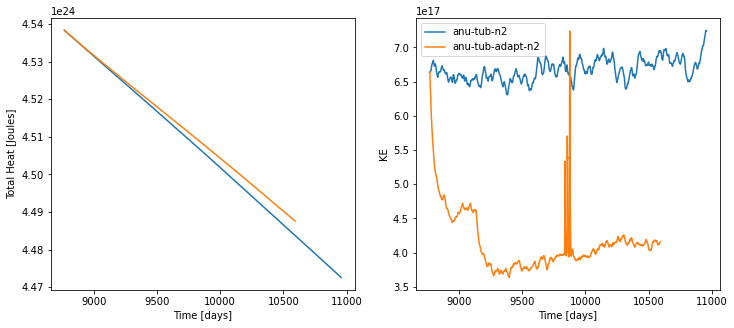

In [9]:
fig, ax = plt.subplots(1,2,figsize=(12,5))

for experiment in experiments:
    variable = 'Heat'
    darray = cc.querying.getvar(experiment, variable, session,ncfile='ocean.stats.nc',decode_times=False)
    darray.coords['Time'] = darray.coords['Time']
    darray.plot(ax=ax[0],label=experiment)
    
    variable = 'KE'
    darray = cc.querying.getvar(experiment, variable, session,ncfile='ocean.stats.nc',decode_times=False)
    darray.coords['Time'] = darray.coords['Time']
    darray.sum('Layer').plot(ax=ax[1],label=experiment)
    
plt.legend()

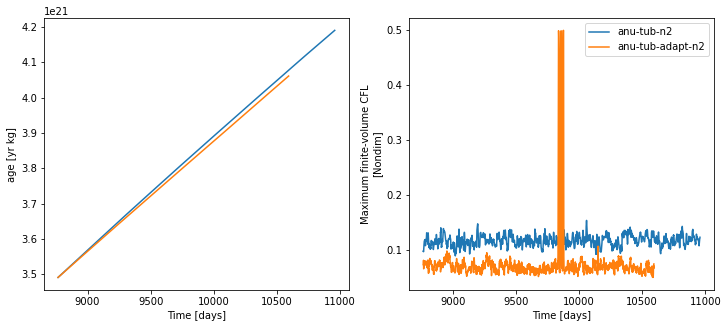

In [10]:
fig, ax = plt.subplots(1,2,figsize=(12,5))

for experiment in experiments:
    variable = 'age'
    darray = cc.querying.getvar(experiment, variable, session,ncfile='ocean.stats.nc',decode_times=False)
    darray.coords['Time'] = darray.coords['Time']
    darray.plot(ax=ax[0],label=experiment)
    
    variable = 'max_CFL_trans'
    darray = cc.querying.getvar(experiment, variable, session,ncfile='ocean.stats.nc',decode_times=False)
    darray.coords['Time'] = darray.coords['Time']
    darray.plot(ax=ax[1],label=experiment)

    
plt.legend()

# Plot N-S transect after a number of days.

Text(0.5, 0, 'Latitude')

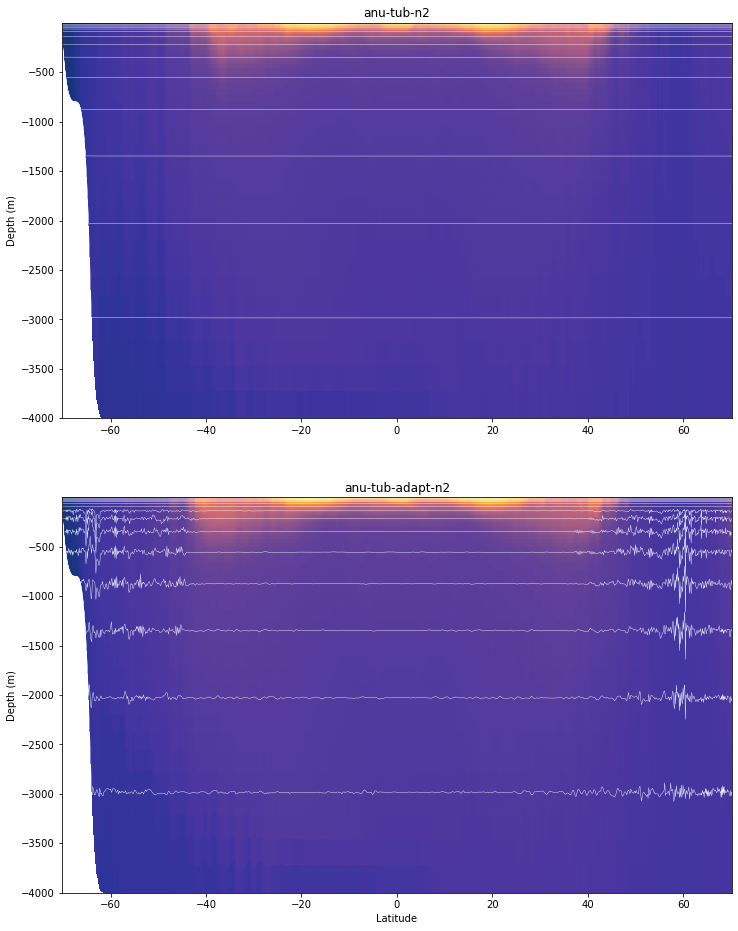

In [11]:
fig, ax = plt.subplots(2,1,figsize=(12,16))
vlev = np.linspace(-2,32,34)

i=0
timeslice = -1
for experiment in experiments:
    harray = cc.querying.getvar(experiment, 'h', session,frequency='5 daily')#,ncfile='prog.nc')
    tarray = cc.querying.getvar(experiment, 'temp', session,frequency='5 daily')#,ncfile='prog.nc')
    #harray = xr.open_mfdataset('/g/data/x77/amh157/anu-tub/outputs/'+experiment+'/output*/prog.nc').h
    #tarray = xr.open_mfdataset('/g/data/x77/amh157/anu-tub/outputs/'+experiment+'/output*/prog.nc').temp

    h1 = harray.isel(time=-1).isel(xh=30).cumsum('zl').load()
    for p in range(15):
        ax[i].plot(h1.yh,-h1.isel(zl=p*5),color='w',linewidth=0.4)
    
    t1 = tarray.isel(time=-1).isel(xh=30).load()
    ax[i].pcolormesh(t1.yh,-h1,t1,cmap=cm.cm.thermal)
    #ax[i].set_ylim([-500,0])
    ax[i].set_ylabel('Depth (m)')
    ax[i].set_title(experiment)
    i+=1

ax[i-1].set_xlabel('Latitude')
